In [106]:
pip install pandas

In [107]:
# O código abaixo foi construído no Jupyter Notebook -> Aconselho transportá-lo para o Google Colab ... 

import pandas as pd 

df = pd.read_csv('./acidentes.csv', sep=';')

print(df)

             data_extracao  predial1  queda_arr                 data  feridos  \
0      2023-06-01 01:34:24       0.0        0.0  2020-10-17 00:00:00        1   
1      2023-06-01 01:34:24     170.0        0.0  2018-01-01 00:00:00        1   
2      2023-06-01 01:34:24    2617.0        0.0  2018-01-01 00:00:00        0   
3      2023-06-01 01:34:24    1590.0        0.0  2018-01-01 00:00:00        1   
4      2023-06-01 01:34:24       0.0        0.0  2018-01-01 00:00:00        1   
...                    ...       ...        ...                  ...      ...   
66974  2023-06-01 01:34:24     720.0        0.0  2023-05-30 00:00:00        0   
66975  2023-06-01 01:34:24     569.0        0.0  2023-05-30 00:00:00        0   
66976  2023-06-01 01:34:24    1369.0        0.0  2023-05-29 00:00:00        0   
66977  2023-06-01 01:34:24   11120.0        0.0  2023-05-30 00:00:00        0   
66978  2023-06-01 01:34:24      80.0        0.0  2023-05-30 00:00:00        0   

       feridos_gr  mortes  

In [108]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [109]:
# Deletar linhas NaN nas colunas latitude e longitude -> Evitar mensagens de erro durante o processamento ... 

df = df.dropna(subset=['latitude', 'longitude'], how='any')

print(df)

             data_extracao  predial1  queda_arr                 data  feridos  \
0      2023-06-01 01:34:24       0.0        0.0  2020-10-17 00:00:00        1   
1      2023-06-01 01:34:24     170.0        0.0  2018-01-01 00:00:00        1   
2      2023-06-01 01:34:24    2617.0        0.0  2018-01-01 00:00:00        0   
3      2023-06-01 01:34:24    1590.0        0.0  2018-01-01 00:00:00        1   
5      2023-06-01 01:34:24    4473.0        0.0  2018-01-02 00:00:00        1   
...                    ...       ...        ...                  ...      ...   
66974  2023-06-01 01:34:24     720.0        0.0  2023-05-30 00:00:00        0   
66975  2023-06-01 01:34:24     569.0        0.0  2023-05-30 00:00:00        0   
66976  2023-06-01 01:34:24    1369.0        0.0  2023-05-29 00:00:00        0   
66977  2023-06-01 01:34:24   11120.0        0.0  2023-05-30 00:00:00        0   
66978  2023-06-01 01:34:24      80.0        0.0  2023-05-30 00:00:00        0   

       feridos_gr  mortes  

In [110]:
import folium 
from folium.plugins import HeatMap

mapa            = folium.Map(location=[-30.1, -51.15], zoom_start=11)
coordenadas     = list(zip(df.latitude, df.longitude))
mapa_calor      = HeatMap(coordenadas, radius=9, blur=10)
mapa.add_child(mapa_calor)

# Valores NaN significam valores vazios, ou seja, faltantes na base de dados ... 

print(mapa)

In [111]:
# Pesquisando acidentes por região na cidade de Porto Alegre ... 

from folium.plugins import MarkerCluster

mapa            = folium.Map(location=[-30.1, -51.15], zoom_start=11)
mapa_cluster    = MarkerCluster(coordenadas)
mapa.add_child(mapa_cluster)

print(mapa)

In [112]:
# O índice é o equivalente ao nome da linha -> Perceba o destaque para a data de inserção da informação ... 

df.data

0        2020-10-17 00:00:00
1        2018-01-01 00:00:00
2        2018-01-01 00:00:00
3        2018-01-01 00:00:00
5        2018-01-02 00:00:00
                ...         
66974    2023-05-30 00:00:00
66975    2023-05-30 00:00:00
66976    2023-05-29 00:00:00
66977    2023-05-30 00:00:00
66978    2023-05-30 00:00:00
Name: data, Length: 56274, dtype: object

In [113]:
# O código abaixo irá ignorar os anos que não constem cronologicamente na base de dados, de modo que estes não serão transformados em datas no DataFrame ... 

df['data'] = pd.to_datetime(df['data'], errors='coerce')

df_ano = df['data'].dt.year.value_counts()

print(df_ano)

data
2022.0    13315
2019.0    12444
2021.0    11699
2018.0    10319
2023.0     5597
2020.0     2894
2026.0        2
2202.0        1
2043.0        1
Name: count, dtype: int64


In [114]:
# Eliminando o índice 2202 do DataFrame -> Pois trata-se de um erro ... 

df_ano = df_ano.drop(2202) 

print(df_ano)

data
2022.0    13315
2019.0    12444
2021.0    11699
2018.0    10319
2023.0     5597
2020.0     2894
2026.0        2
2043.0        1
Name: count, dtype: int64


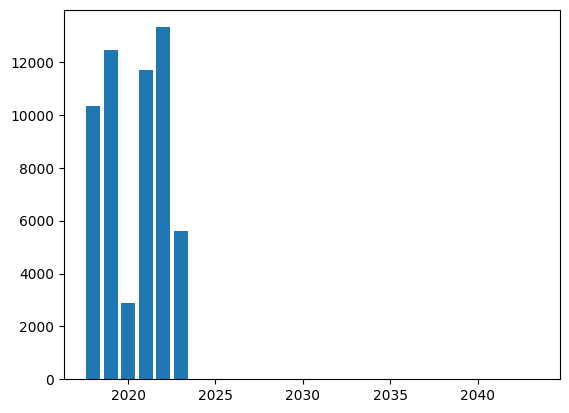

In [115]:
# from pandas import Grouper

import matplotlib.pyplot as plt 

plt.bar(df_ano.index, df_ano.values) # Índices no eixo X e anos no eixo Y ... 

plt.show()

In [ ]:
df_ano / df_ano.max()

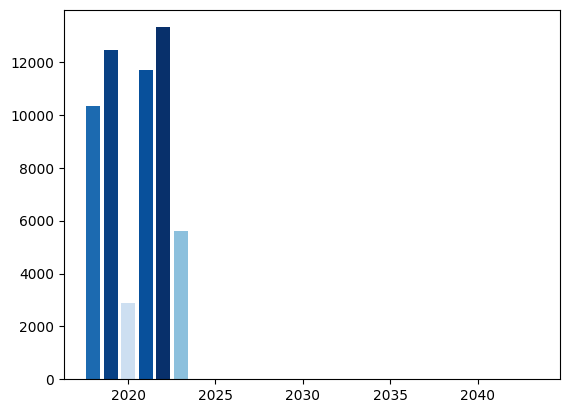

In [117]:
# Criando tons de cores diferentes para cada ano pesquisado ... 

gradiente   = df_ano / df_ano.max()

cores       = plt.cm.Blues(gradiente)

plt.bar(df_ano.index, df_ano.values, color = cores)

plt.show()

In [ ]:
# X = Quantidades de acidentes ... 

# Y = Coresponde ao ano apresentado na base de dados ... 